c:\Users\Şerife GÖKDAŞ\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [23:40:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1301
           1       0.86      0.89      0.87      1244

    accuracy                           0.87      2545
   macro avg       0.87      0.87      0.87      2545
weighted avg       0.87      0.87      0.87      2545



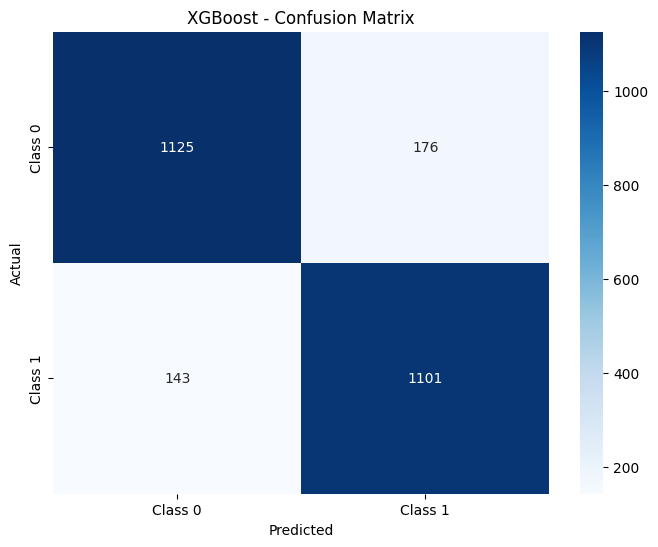

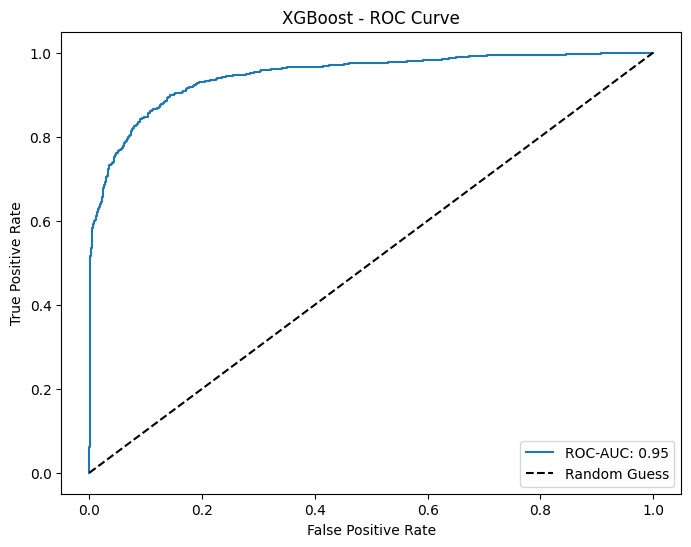

['xgboost_model.pkl']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import joblib 

# Veriyi yükleme
data = pd.read_csv('data_vectorized.csv')

# Veriyi ayırma (özellikler ve etiketler)
X = data.drop(columns=['Label'])  # Etiket hariç tüm sütunlar
y = data['Label']  # Etiket

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost modelini oluşturma ve eğitim
xgb_classifier = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = xgb_classifier.predict(X_test)

# Doğruluk hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")

# Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Hesaplama ve Grafik
if len(set(y_test)) == 2:  # İkili sınıflandırma kontrolü
    roc_auc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])  # Tahmin olasılıkları
    fpr, tpr, thresholds = roc_curve(y_test, xgb_classifier.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("XGBoost - ROC Curve")
    plt.legend()
    plt.show()

# XGBoost modelini kaydetme
joblib.dump(xgb_classifier, 'xgboost_model.pkl')  # Modeli kaydet
